In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
print("Shape of the dataset:", data.shape)
print("\nColumns in the dataset:\n", data.columns)
print("\nMissing values in each column:\n", data.isnull().sum())
print("\nData types:\n",data.dtypes)
print("\nSummary Statistics:\n",data.describe(include='all'))

Shape of the dataset: (891, 15)

Columns in the dataset:
 Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Missing values in each column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Data types:
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Summary Statistics:
           su

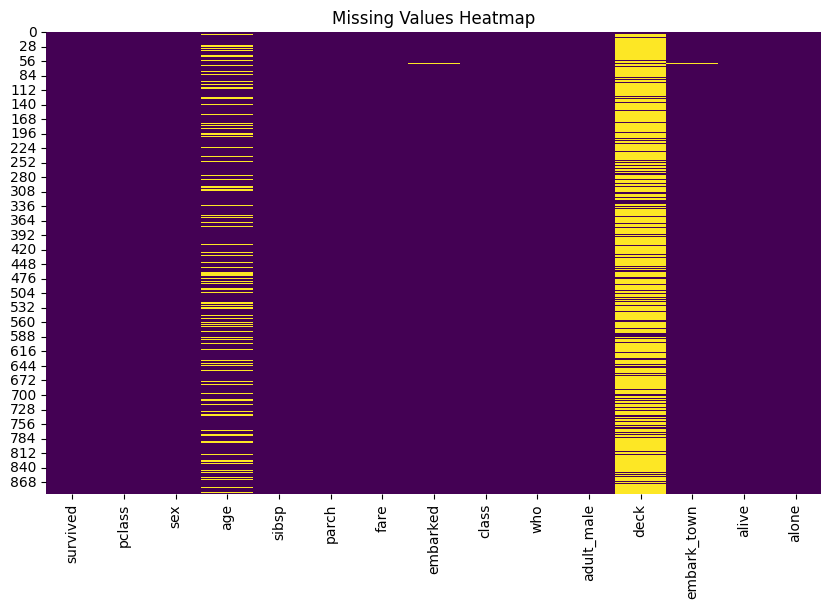

,0
deck,688
age,177
embarked,2
embark_town,2
sex,0
pclass,0
survived,0
fare,0
parch,0
sibsp,0


In [4]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()
data.isnull().sum().sort_values(ascending=False)

In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
data_filled = data.copy()
numerical_cols =data_filled.select_dtypes(include=['number']).columns
categorical_cols = data_filled.select_dtypes(exclude=['number']).columns
imputer_num = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
data_filled[numerical_cols] = imputer_num.fit_transform(data_filled[numerical_cols])
for col in categorical_cols:
  data_filled[col] = data_filled[col].fillna(data_filled[col].mode()[0])
print("\nMissing values after imputation:\n", data_filled.isnull().sum())


Missing values after imputation:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


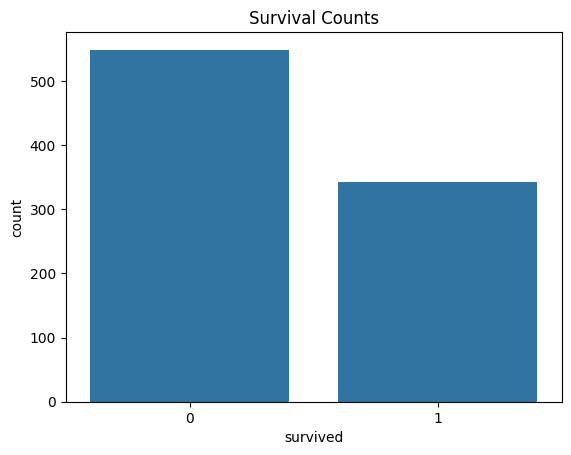

,proportion
survived,
0,0.616162
1,0.383838


In [7]:
sns.countplot(data=data, x='survived')
plt.title('Survival Counts')
plt.show()
data['survived'].value_counts(normalize=True)


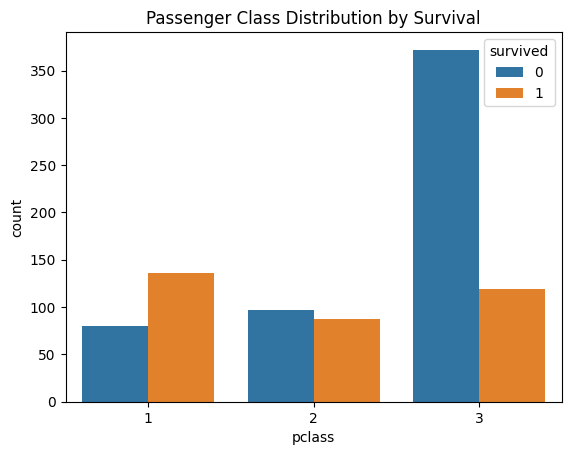

In [9]:
sns.countplot(data=data, x='pclass', hue='survived')
plt.title('Passenger Class Distribution by Survival')
plt.show()


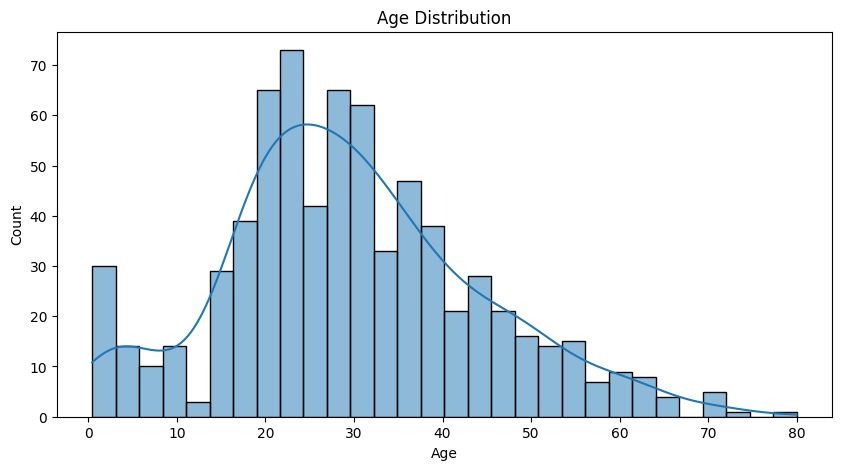

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(data['age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


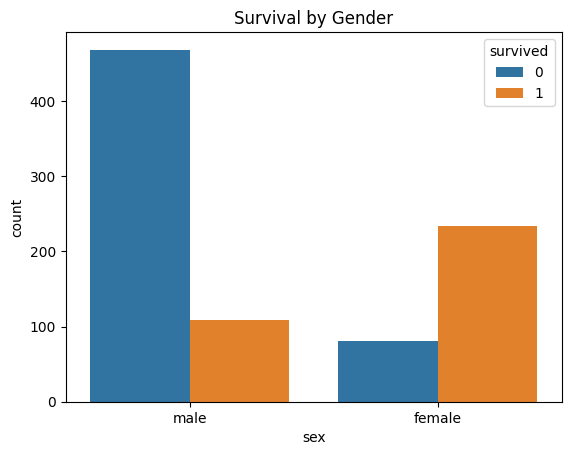

In [11]:
sns.countplot(data=data, x='sex', hue='survived')
plt.title('Survival by Gender')
plt.show()


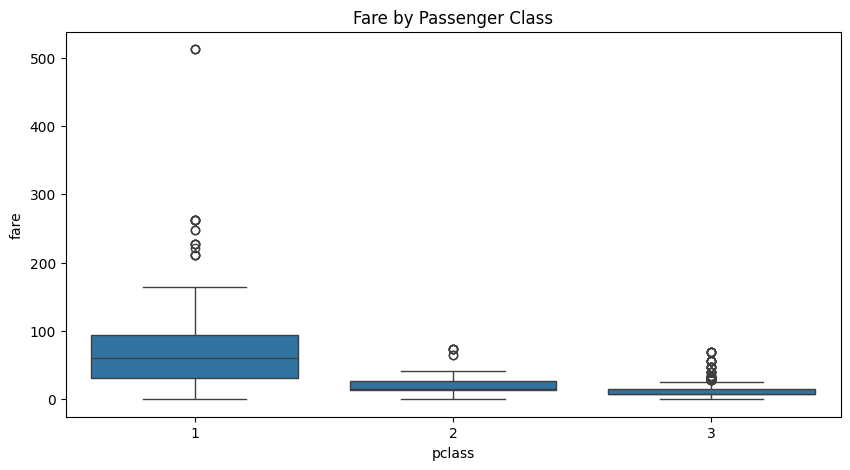

,fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x='pclass', y='fare', data=data)
plt.title('Fare by Passenger Class')
plt.show()
data['fare'].describe()


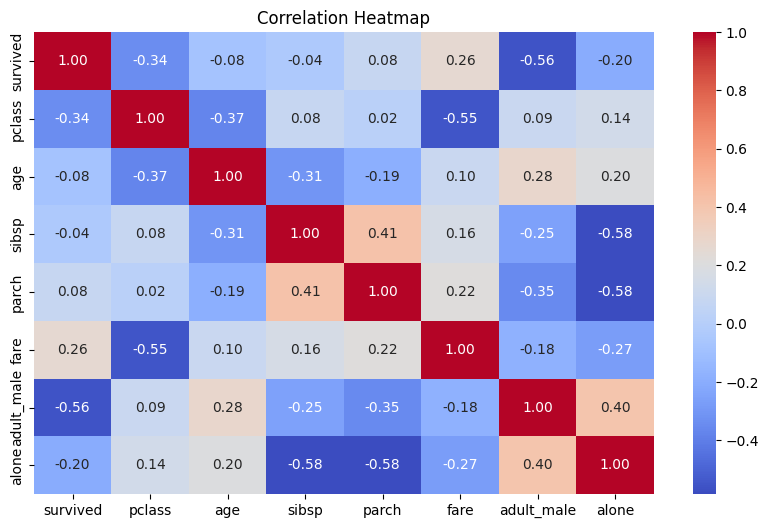

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()



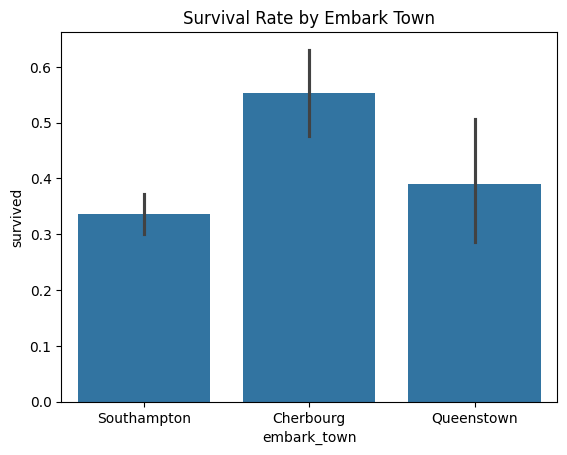

In [14]:
sns.barplot(x='embark_town', y='survived', data=data)
plt.title('Survival Rate by Embark Town')
plt.show()


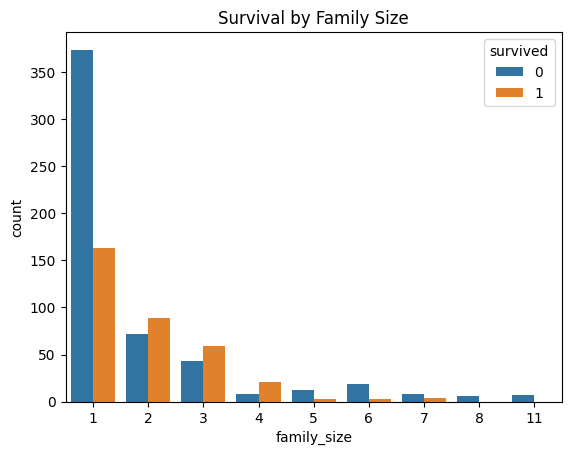

In [15]:
data['family_size'] = data['sibsp'] + data['parch'] + 1
sns.countplot(data=data, x='family_size', hue='survived')
plt.title('Survival by Family Size')
plt.show()


In [ ]:
#Conclusion
# Survival Rate: Only 38% of passengers survived, making the dataset imbalanced toward non-survivors.

# Gender Impact: Females had a significantly higher survival rate than males — gender was a strong predictor of survival.

# Passenger Class: 1st class passengers survived more often, while 3rd class had the highest fatality rate.

# Age Distribution: Most passengers were between 20–40 years old; children under 10 had better chances of survival.

# Fare Analysis: Passengers who paid higher fares were more likely to survive, showing a link between wealth and safety.

# Embarkation Port: Passengers boarding from Cherbourg had higher survival rates compared to those from Southampton or Queenstown.

# Family Size: Those with small families (2–4 members) had better survival rates than solo travelers or those with large families.

# Outliers: There were outliers in fare and age, especially fares exceeding 300 — these need special handling in modeling.

# Missing Values: Columns like deck, age, and embark_town had missing data, especially deck (mostly null).

# Correlations: Survival is positively correlated with fare, negatively with pclass, and strongly influenced by sex.

